In [ ]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from colorama import Fore, Back, Style
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_set = pd.read_csv("/content/train.csv")
test_set = pd.read_csv("/content/test.csv")

In [ ]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


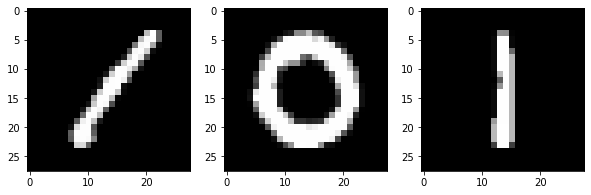

In [ ]:
# Display 3 handwritten digits as exampples
sample = []
for i in range(3):
    temp = np.array(train_set.iloc[i, 1:])
    sample.append(np.reshape(temp, (28, 28)))
    
# Create a subplot to display images
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3))
ax0.imshow(sample[0], cmap='gray')
ax1.imshow(sample[1], cmap='gray')
ax2.imshow(sample[2], cmap='gray')

In [ ]:
# Divide train_set into the handwritten and label
handwritten = train_set.iloc[:, 1:]
label = train_set.iloc[:, 0]

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(handwritten, label, test_size = .33, random_state=42)

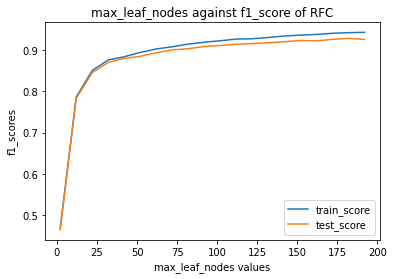

In [ ]:
# RandomForestClassifier
# Tune the 'max_leaf_nodes' param

train_f1_scores = []
test_f1_scores = []

max_leaf_candidates = np.arange(2, 200, 10)

for i in max_leaf_candidates:
    # Train the classifier
    rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=i).fit(X_train, y_train)
    
    # Calculate train_f1_score 
    train_preds = rfc.predict(X_train)
    score0 = f1_score(y_train, train_preds, average='weighted')
    train_f1_scores.append(score0)
    
    # Calculate test_f1_score
    test_preds = rfc.predict(X_test)
    score1 = f1_score(y_test, test_preds, average='weighted')
    test_f1_scores.append(score1)

plt.figure()
plt.title("max_leaf_nodes against f1_score of RFC")
plt.xlabel("max_leaf_nodes values")
plt.ylabel("f1_scores")
plt.plot(max_leaf_candidates, train_f1_scores, label='train_score')
plt.plot(max_leaf_candidates, test_f1_scores, label='test_score')
plt.legend()
plt.show()

In [ ]:
# 1st Modeling 
rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=25).fit(X_train, y_train)
preds = rfc.predict(X_test)
print(Fore.YELLOW + Back.BLACK + "{:^{width}}".format("Random Forest Classification Report:", width=70))
print(Fore.RESET + Back.RESET + classification_report(y_test, preds))

                 Random Forest Classification Report:                 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1333
           1       0.86      0.98      0.91      1520
           2       0.88      0.84      0.86      1414
           3       0.79      0.83      0.81      1471
           4       0.87      0.81      0.84      1358
           5       0.93      0.63      0.75      1205
           6       0.87      0.89      0.88      1397
           7       0.89      0.87      0.88      1480
           8       0.85      0.80      0.83      1334
           9       0.74      0.85      0.79      1348

    accuracy                           0.85     13860
   macro avg       0.86      0.85      0.85     13860
weighted avg       0.85      0.85      0.85     13860



In [ ]:
del train_f1_scores
del test_f1_scores
del rfc

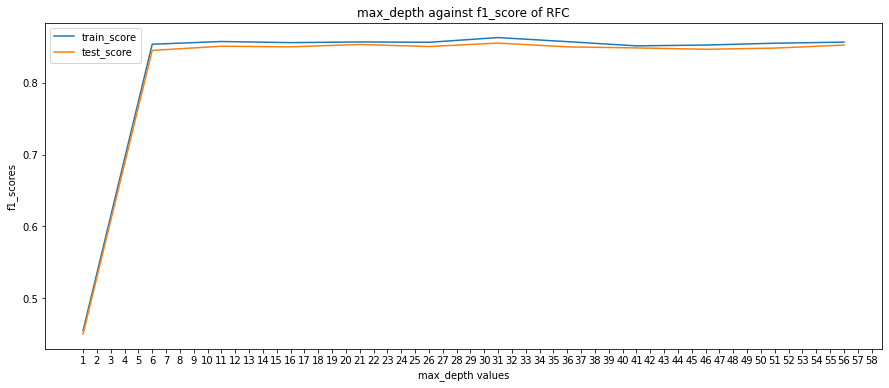

In [ ]:
# RandomForestClassifier
# Tune the 'max_depth' param

train_f1_scores = []
test_f1_scores = []

max_depth_candidates = np.arange(1, 61, 5)

for i in max_depth_candidates:
    # Train the classifier
    rfc = RandomForestClassifier(n_estimators=100, max_leaf_nodes=25, max_depth=i).fit(X_train, y_train)
    
    # Calculate train_f1_score 
    train_preds = rfc.predict(X_train)
    score0 = f1_score(y_train, train_preds, average='weighted')
    train_f1_scores.append(score0)  
    # Calculate test_f1_score
    test_preds = rfc.predict(X_test)
    score1 = f1_score(y_test, test_preds, average='weighted')
    test_f1_scores.append(score1)

plt.figure(figsize=(15, 6))
plt.title("max_depth against f1_score of RFC")
plt.xlabel("max_depth values")
plt.ylabel("f1_scores")
plt.xticks(range(1, 62))
plt.plot(max_depth_candidates, train_f1_scores, label='train_score')
plt.plot(max_depth_candidates, test_f1_scores, label='test_score')
plt.legend()
plt.show()
#print(Fore.WHITE + Back.BLACK + f"Prediction Accuracy = {accuracy_score(y_test, preds)}")

In [ ]:
# 2nd Modeling 
rfc = RandomForestClassifier(n_estimators=100, max_depth=6, max_leaf_nodes=25).fit(X_train, y_train)
preds = rfc.predict(X_test)
print(Fore.YELLOW + Back.BLACK + "{:^{width}}".format("Random Forest Classification Report:", width=70))
print(Fore.RESET + Back.RESET + classification_report(y_test, preds))

                 Random Forest Classification Report:                 
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1333
           1       0.85      0.98      0.91      1520
           2       0.90      0.84      0.87      1414
           3       0.82      0.83      0.82      1471
           4       0.88      0.82      0.85      1358
           5       0.90      0.66      0.76      1205
           6       0.88      0.90      0.89      1397
           7       0.87      0.88      0.88      1480
           8       0.86      0.80      0.83      1334
           9       0.73      0.83      0.78      1348

    accuracy                           0.85     13860
   macro avg       0.86      0.85      0.85     13860
weighted avg       0.86      0.85      0.85     13860



In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28140, 784)
(13860, 784)
(28140,)
(13860,)


In [ ]:
# Reshape
X_train = X_train.values.reshape(-1,28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Normalize
X_train = X_train/255.0
X_test = X_test/255.0

# Neural Network
model = keras.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                          keras.layers.AveragePooling2D((2, 2)),
                          keras.layers.Conv2D(64, (3, 3), activation='relu'),
                          keras.layers.AveragePooling2D((2, 2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dropout(.5),
                          keras.layers.Dense(10, activation='softmax')])

# Compile
model.compile(optimizer='adam',
              metrics=['accuracy'], 
              loss='sparse_categorical_crossentropy')

# Train
history = model.fit(X_train, y_train, epochs=80, validation_data=(X_test, y_test))

# Test
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/80
880/880 [==============================] - 34s 37ms/step - loss: 0.3678 - accuracy: 0.8886 - val_loss: 0.0933 - val_accuracy: 0.9711
Epoch 2/80
880/880 [==============================] - 32s 36ms/step - loss: 0.1323 - accuracy: 0.9608 - val_loss: 0.0716 - val_accuracy: 0.9783
Epoch 3/80
880/880 [==============================] - 34s 38ms/step - loss: 0.1027 - accuracy: 0.9692 - val_loss: 0.0578 - val_accuracy: 0.9823
Epoch 4/80
880/880 [==============================] - 32s 36ms/step - loss: 0.0837 - accuracy: 0.9741 - val_loss: 0.0551 - val_accuracy: 0.9823
Epoch 5/80
880/880 [==============================] - 32s 36ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0424 - val_accuracy: 0.9864
Epoch 6/80
880/880 [==============================] - 31s 35ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.0508 - val_accuracy: 0.9835
Epoch 7/80
880/880 [==============================] - 34s 38ms/step - loss: 0.0517 - accuracy: 0.9836 - val_loss: 0.0419 - val_accuracy:

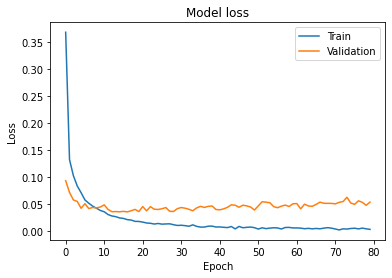

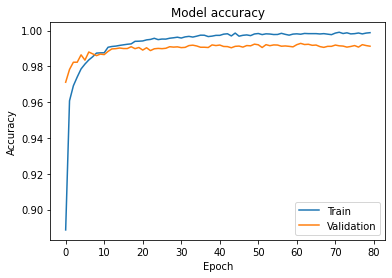

In [ ]:
# Plot the performance of the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Display the result
print(Fore.YELLOW + Back.BLACK + f"Accuracy = {accuracy}")
print(Fore.YELLOW + Back.BLACK + f"Loss = {loss}")

Accuracy = 0.9912698268890381
Loss = 0.05374225601553917


In [ ]:
# Pridict
predictions = model.predict(X_test)

np.argmax(predictions[0])

434/434 [==============================] - 5s 11ms/step


8

In [ ]:
# Display 30 predictions

# Set up the subplots
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
axs = axs.ravel()

for i, img in enumerate(X_test[0:16, :]):
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(f"True value: {y_test.iloc[i]}\n Predicted value: {np.argmax(predictions[i])}")

plt.tight_layout()
plt.show()

In [ ]:
# Predict on the test_set
test_set = test_set.values.reshape(-1, 28, 28, 1)
test_preds = model.predict(test_set)

# Declare a list to store the predictions
final_preds = []

# Iterate through predictions and store them in final_preds
for i in range(len(test_preds)):
    final_preds.append("{:.0f}".format(np.argmax(test_preds[i])))

# Convert final_preds to a Data Frame
labels = pd.DataFrame(final_preds, columns = ['Label'])

# Create a pandas Data Drame to store image ids
image_id = pd.DataFrame(range(1, len(test_set)+1), columns=['ImageId'])
image_id.head()

875/875 [==============================] - 10s 11ms/step


,ImageId
0,1
1,2
2,3
3,4
4,5


In [ ]:
# Submission
submission_preds = pd.concat([image_id, labels], axis=1)
submission_preds.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
